In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv('/content/Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


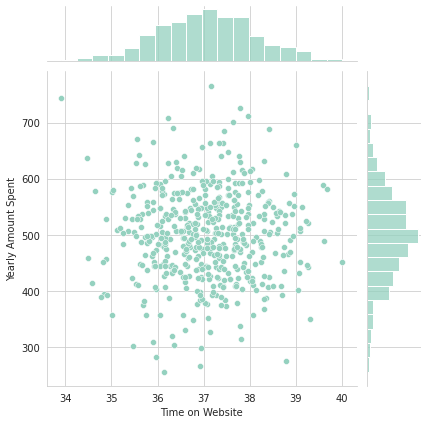

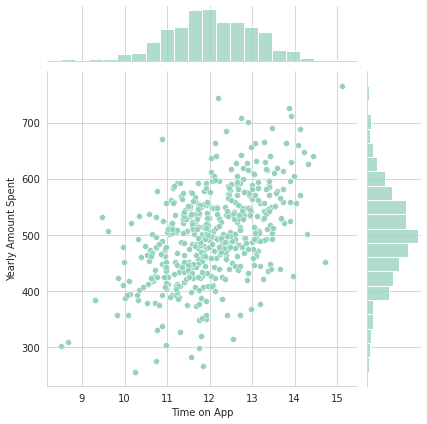

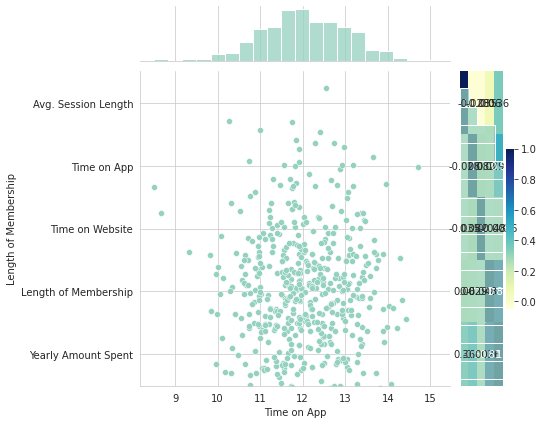

In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)
sns.jointplot(x='Time on App',y='Length of Membership',data=customers)

sns.heatmap(customers.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Training and Testing Data**

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [9]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Training the Model**

**Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

In [17]:
print('MAPE :'," ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAPE :   0.014567988642853974
MAE :   7.228148653430826
MSE :   79.81305165097427
RMAE :   8.933815066978624


**Decision Tree Regressor**

In [23]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [24]:
print('MAPE :'," ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAPE :   0.04878623213818674
MAE :   23.720648190775538
MSE :   911.7678906470749
RMAE :   30.195494542184186


**Random Forest Regressor**

In [21]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [22]:
print('MAPE :'," ", metrics.mean_absolute_percentage_error(y_test,predictions))
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAPE :   0.029692229010291733
MAE :   14.464264757520608
MSE :   434.5325393474098
RMAE :   20.845444090913723
